In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df0=pd.read_csv("train.csv")

In [3]:
df0.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1/1/2011 0:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1/1/2011 1:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1/1/2011 2:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1/1/2011 3:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1/1/2011 4:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df0.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [5]:
df0.shape

(10886, 12)

In [6]:
df0.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [7]:
df0['datetime'] = pd.to_datetime(df0['datetime'])

def extract_feature(df):
    df["year"] = df['datetime'].dt.year
    df["day"] = df['datetime'].dt.day
    df["month"] = df['datetime'].dt.month
    df["hour"] = df['datetime'].dt.hour
    df['dayofweek'] = df['datetime'].dt.dayofweek


extract_feature(df0)

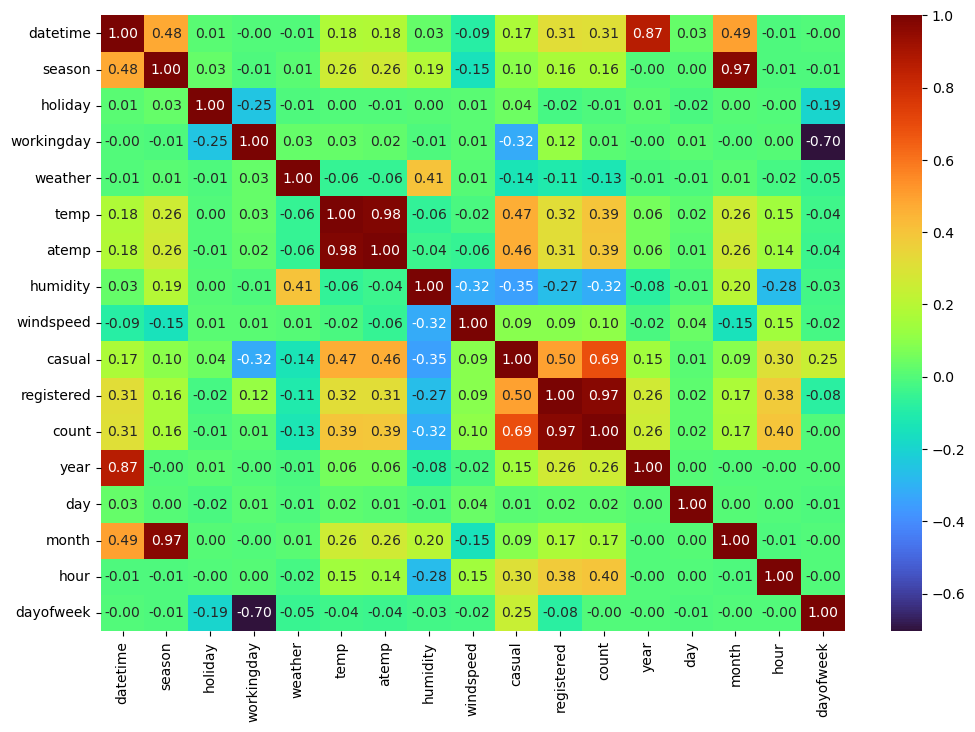

In [8]:
df_corr=df0.corr()
plt.figure(figsize=(12,8))
sns.heatmap(df_corr,annot=True,fmt=".2f",cmap="turbo")
plt.show()

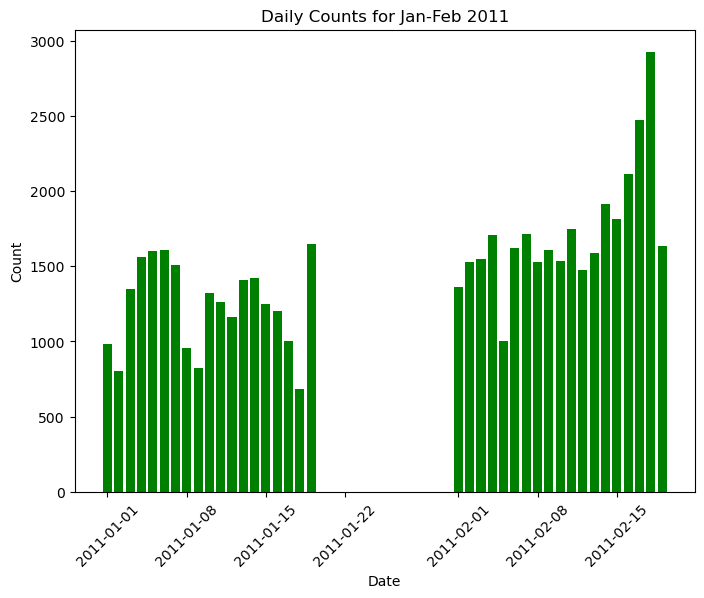

In [9]:
filtered_df = df0[(df0['datetime'] >= '2011-01-01') & (df0['datetime'] <= '2011-02-28')]
daily_counts = filtered_df.groupby(filtered_df['datetime'].dt.date)['count'].sum()
dates = daily_counts.index
counts = daily_counts.values
plt.figure(figsize=(8,6))
plt.bar(dates, counts, color='green')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Daily Counts for Jan-Feb 2011')
plt.xticks(rotation=45)
plt.show()

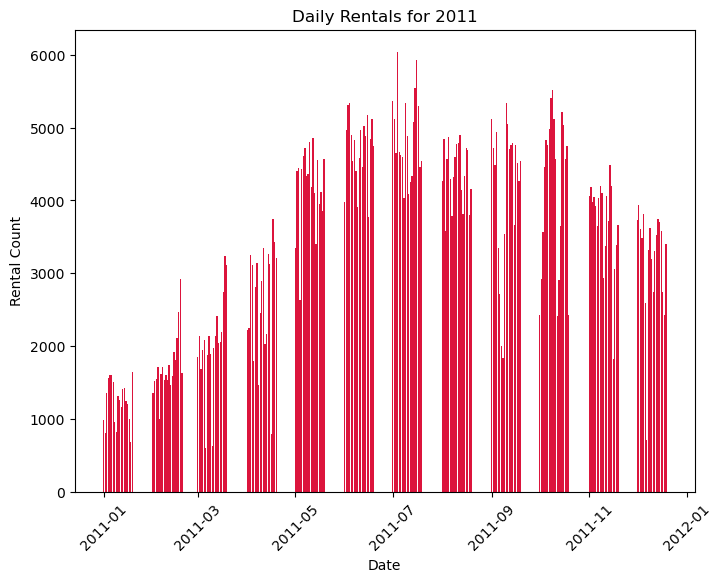

In [10]:
df0['datetime'] = pd.to_datetime(df0['datetime'])
df_2011 = df0[df0['datetime'].dt.year == 2011]
daily_counts = df_2011.groupby(df_2011['datetime'].dt.date)['count'].sum()
dates = daily_counts.index
counts = daily_counts.values
plt.figure(figsize=(8,6))
plt.bar(dates, counts, color='crimson')
plt.xlabel('Date')
plt.ylabel('Rental Count')
plt.title('Daily Rentals for 2011')
plt.xticks(rotation=45)
plt.show()

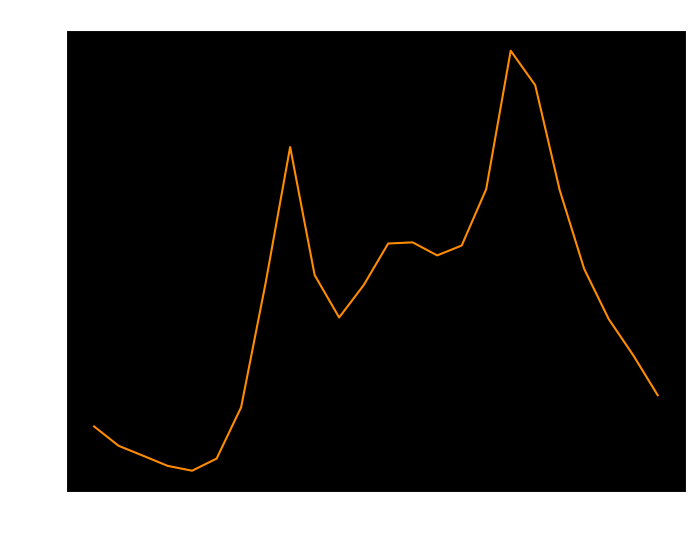

In [11]:
group_hour = df0.groupby(['hour'])
average_hour = group_hour['count'].mean()
plt.figure(figsize=(8,6))
plt.style.use("dark_background")
plt.plot(average_hour.index,average_hour,color="darkorange")

plt.xlabel('Hour')
plt.ylabel('Rental Count')
plt.xticks(np.arange(24))
# plt.grid(True)
plt.title('Average Hourly Rental Count')
plt.show()

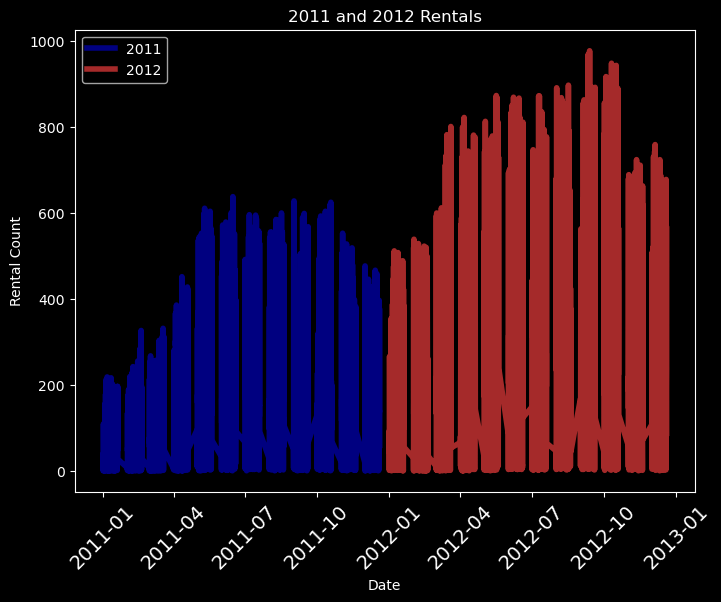

In [12]:
plt.figure(figsize=(8,6))
df_2011 = df0[df0['datetime'].dt.year == 2011]
df_2012 = df0[df0['datetime'].dt.year == 2012]

plt.plot(df_2011['datetime'], df_2011['count'], label='2011',color="navy",lw=4)
plt.plot(df_2012['datetime'], df_2012['count'], label='2012',color="brown",lw=4)
plt.xticks(fontsize=14, rotation=45)
plt.xlabel('Date')
plt.ylabel('Rental Count')
plt.title('2011 and 2012 Rentals')
plt.legend()
plt.show()

In [13]:
group_year_month = df0.groupby(['year','month'])
average_year_month = group_year_month['count'].mean()
average_year_month

year  month
2011  1         54.645012
      2         73.641256
      3         86.849776
      4        111.026374
      5        174.809211
      6        196.877193
      7        203.614035
      8        182.666667
      9        174.622517
      10       174.773626
      11       155.458333
      12       134.173246
2012  1        124.353201
      2        145.646154
      3        208.276923
      4        257.455947
      5        264.109649
      6        287.186404
      7        267.037281
      8        285.570175
      9        292.598684
      10       280.508772
      11       231.980220
      12       217.054825
Name: count, dtype: float64

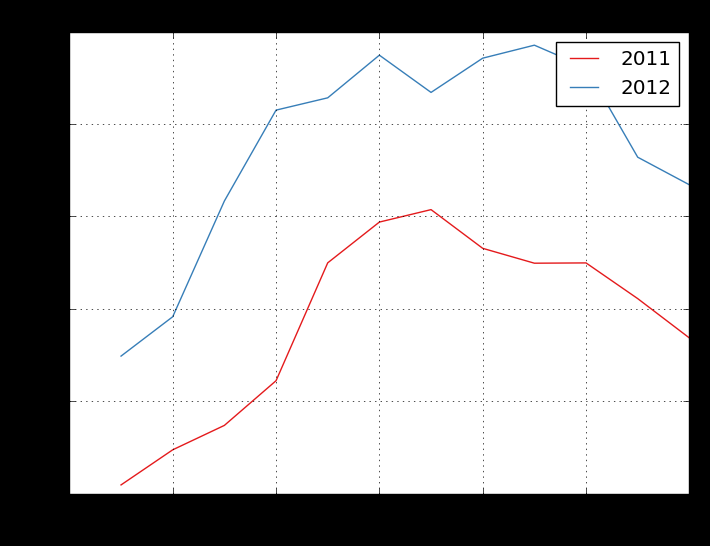

In [14]:
plt.figure(figsize=(8,6)) 
plt.style.use("classic")

import matplotlib.cm as cm


colors = cm.Set1.colors


for i, year in enumerate(average_year_month.index.levels[0]):
    color = colors[i]  
    plt.plot(average_year_month[year].index, average_year_month[year], label=year, color=color)

plt.legend()    
plt.xlabel('Month')
plt.ylabel('Count')
plt.grid(True)
plt.title('Average Monthly Rental Count for 2011, 2012')
plt.show()


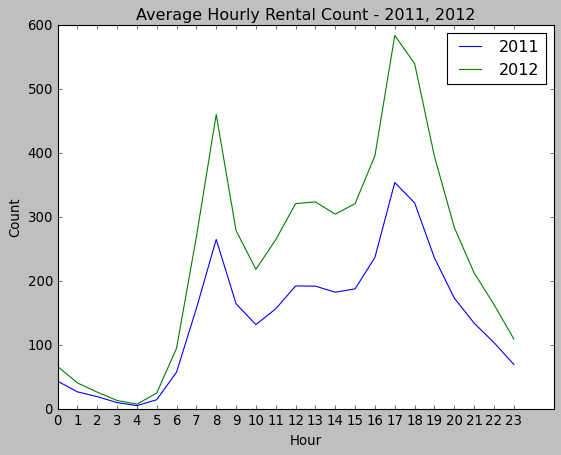

In [15]:
plt.figure(figsize=(8,6)) 
group_year_hour = df0.groupby(['year','hour'])
average_year_hour = group_year_hour['count'].mean()
for year in average_year_hour.index.levels[0]:
    
    plt.plot(average_year_hour[year].index,average_year_hour[year],label=year)
    
plt.legend()    
plt.xlabel('Hour')
plt.ylabel('Count')
plt.xticks(np.arange(24))

plt.title('Average Hourly Rental Count - 2011, 2012')
plt.show()

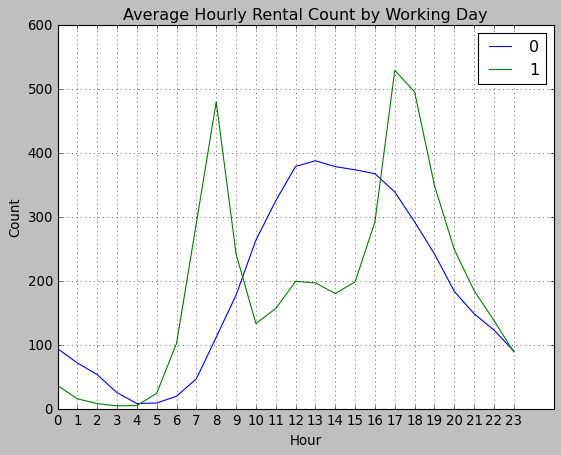

In [16]:
plt.figure(figsize=(8,6))
group_workingday_hour = df0.groupby(['workingday','hour'])
average_workingday_hour = group_workingday_hour['count'].mean()
for workingday in average_workingday_hour.index.levels[0]:
    
    plt.plot(average_workingday_hour[workingday].index,average_workingday_hour[workingday],label=workingday)
    
plt.legend()    
plt.xlabel('Hour')
plt.ylabel('Count')
plt.xticks(np.arange(24))
plt.grid(True)
plt.title('Average Hourly Rental Count by Working Day')
plt.show()


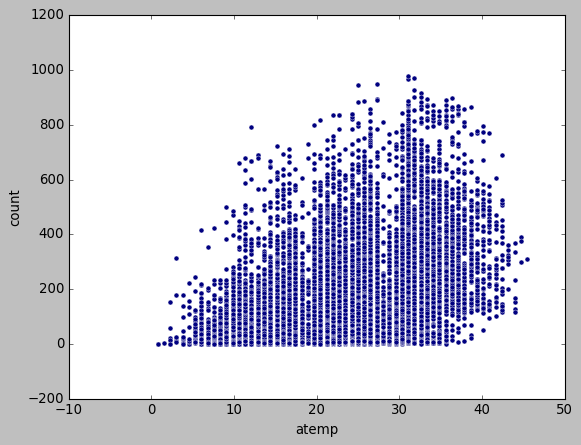

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="atemp",y="count",data=df0,color="navy")
plt.show()

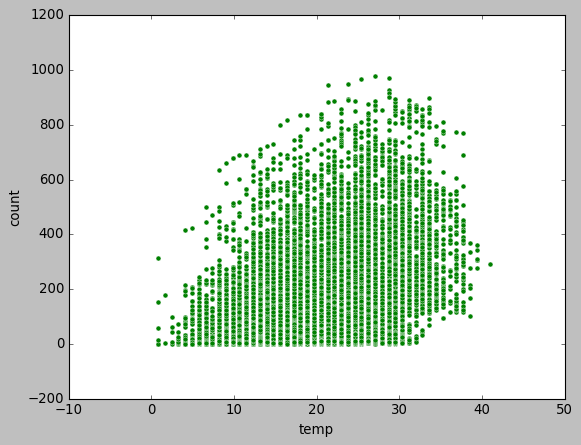

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="temp",y="count",data=df0,color="green")
plt.show()

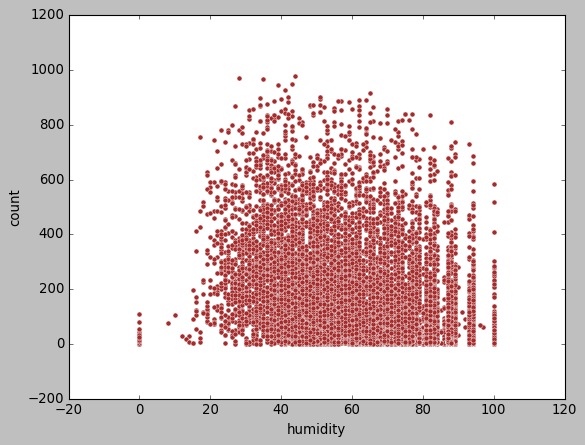

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="humidity",y="count",data=df0,color="brown")
plt.show()

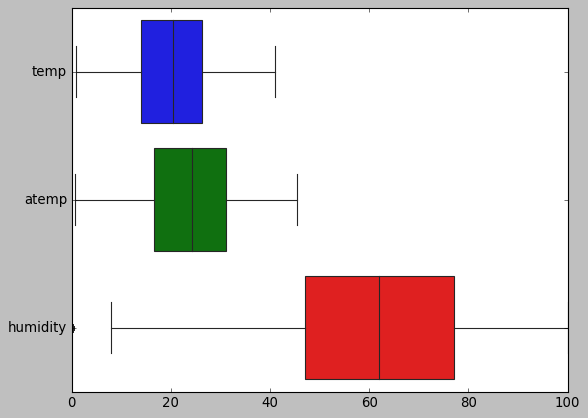

In [20]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df0[["temp","atemp","humidity"]],orient="h")
plt.show()

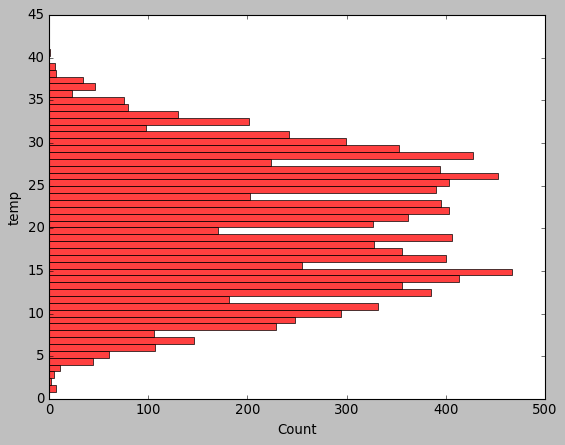

In [21]:
plt.figure(figsize=(8,6))
sns.histplot(data=df0, y="temp",color="red",bins=50)
plt.show()

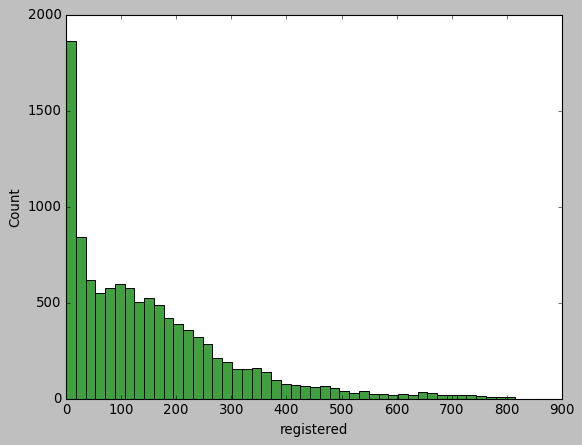

In [22]:
plt.figure(figsize=(8,6))
sns.histplot(data=df0, x="registered",color="green",bins=50)
plt.show()

In [23]:
df0.drop(columns="datetime",axis=1,inplace=True)
from sklearn.model_selection import train_test_split
train=df0.drop(columns=["count"],axis=1)
label=df0["count"]
X_train, X_test, y_train, y_test = train_test_split(train,label, test_size=0.2, random_state=42)

In [26]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 1.3 MB/s eta 0:01:38
   ---------------------------------------- 0.2/124.9 MB 2.0 MB/s eta 0:01:04
   ---------------------------------------- 0.3/124.9 MB 2.2 MB/s eta 0:00:57
   ---------------------------------------- 0.4/124.9 MB 2.3 MB/s eta 0:00:54
   ---------------------------------------- 0.6/124.9 MB 2.7 MB/s eta 0:00:46
   ---------------------------------------- 1.0/124.9 MB 3.8 MB/s eta 0:00:33
    --------------------------------------- 1.6/124.9 MB 5.0 MB/s eta 0:00:25
    --------------------------------------- 2.1/124.9 MB 5.9 MB/s eta 0:00:21
    --------------------------------------- 2.7/124.9 MB 6.4 MB/s eta 0:00:20
   - -------------------------------------- 3.3/124.9 MB 6.9 MB/s eta 0:00:18
   - -------------------------------------- 3.8/124.9 MB 7.5 MB/s eta 0:00:17
   - -------------------------------------- 4.3/124.9 MB 7.9 MB/s eta 0

In [27]:
import xgboost as xgb

regressor = xgb.XGBRegressor(max_depth=5, n_estimators=150)
regressor.fit(X_train,y_train, eval_set = [(X_train, y_train), (X_test, y_test)])

[0]	validation_0-rmse:128.16931	validation_1-rmse:129.38232
[1]	validation_0-rmse:91.03373	validation_1-rmse:92.03796
[2]	validation_0-rmse:64.85075	validation_1-rmse:65.89857
[3]	validation_0-rmse:46.18921	validation_1-rmse:47.25288
[4]	validation_0-rmse:33.02610	validation_1-rmse:34.01990
[5]	validation_0-rmse:23.83169	validation_1-rmse:24.76973
[6]	validation_0-rmse:17.47455	validation_1-rmse:18.26492
[7]	validation_0-rmse:13.13404	validation_1-rmse:13.99897
[8]	validation_0-rmse:10.20786	validation_1-rmse:11.11737
[9]	validation_0-rmse:8.27947	validation_1-rmse:9.26827
[10]	validation_0-rmse:7.03420	validation_1-rmse:8.03308
[11]	validation_0-rmse:6.25173	validation_1-rmse:7.14806
[12]	validation_0-rmse:5.74399	validation_1-rmse:6.70676
[13]	validation_0-rmse:5.32102	validation_1-rmse:6.32412
[14]	validation_0-rmse:5.12870	validation_1-rmse:6.14333
[15]	validation_0-rmse:4.91543	validation_1-rmse:5.94866
[16]	validation_0-rmse:4.77969	validation_1-rmse:5.86476
[17]	validation_0-rms

[143]	validation_0-rmse:1.82299	validation_1-rmse:4.44847
[144]	validation_0-rmse:1.81288	validation_1-rmse:4.45223
[145]	validation_0-rmse:1.80087	validation_1-rmse:4.44248
[146]	validation_0-rmse:1.79661	validation_1-rmse:4.43969
[147]	validation_0-rmse:1.78752	validation_1-rmse:4.43527
[148]	validation_0-rmse:1.77944	validation_1-rmse:4.43527
[149]	validation_0-rmse:1.76433	validation_1-rmse:4.43262


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [28]:
eval_result = regressor.evals_result()
training_rounds = range(len(eval_result['validation_0']['rmse']))

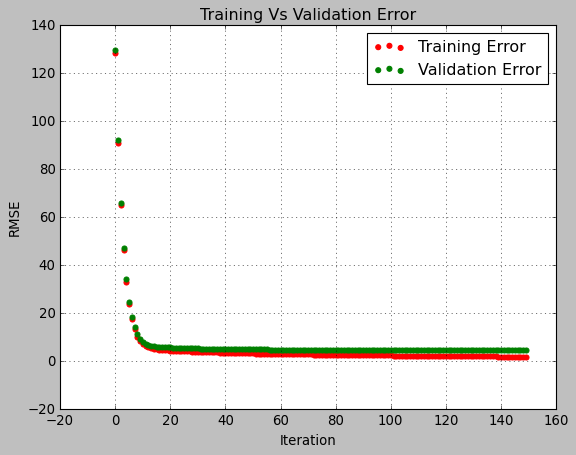

In [29]:
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error',color="red")
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error',color="green")
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

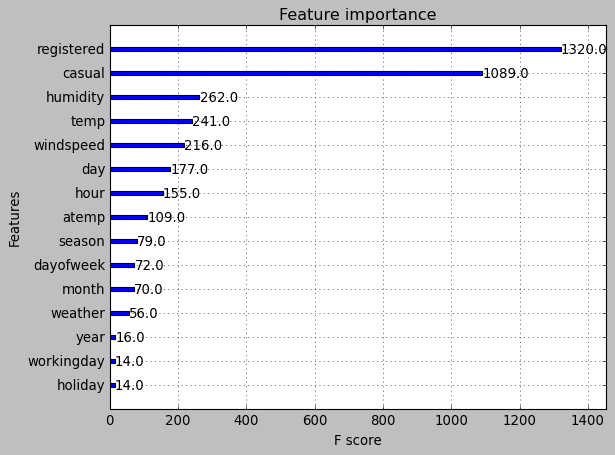

In [30]:
plt.figure(figsize=(8,6))
xgb.plot_importance(regressor)
plt.show()

In [31]:
y_pred=regressor.predict(X_test)

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [33]:
print("*********************************************************")
print("Root Mean Squared Error :",rmse)
print("=========================================================")
print("R2 Score :",r2)
print("=========================================================")
print("Mean Absolute Error :",mae)
print("##########################################################")

*********************************************************
Root Mean Squared Error : 19.64814295203747
R2 Score : 0.9994047268418863
Mean Absolute Error : 2.2321990542832157
##########################################################


# TEST DATA ANALYSIS

In [34]:
df1=pd.read_csv("test.csv")
df1.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,1/20/2011 0:00,1,0,1,1,10.66,11.365,56,26.0027
1,1/20/2011 1:00,1,0,1,1,10.66,13.635,56,0.0000
2,1/20/2011 2:00,1,0,1,1,10.66,13.635,56,0.0000
3,1/20/2011 3:00,1,0,1,1,10.66,12.880,56,11.0014
4,1/20/2011 4:00,1,0,1,1,10.66,12.880,56,11.0014


In [35]:
df1['datetime'] = pd.to_datetime(df1['datetime'])

def extract_feature(df):
    df["year"] = df['datetime'].dt.year
    df["day"] = df['datetime'].dt.day
    df["month"] = df['datetime'].dt.month
    df["hour"] = df['datetime'].dt.hour
    df['dayofweek'] = df['datetime'].dt.dayofweek


extract_feature(df1)

In [36]:
df1.shape

(6493, 14)

In [37]:
df1.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
year          0
day           0
month         0
hour          0
dayofweek     0
dtype: int64

In [38]:
df1.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,day,month,hour,dayofweek
count,6493,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2012-01-13 09:27:47.765285632,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157,2011.503619,25.224550,6.565070,11.555367,3.007239
min,2011-01-20 00:00:00,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000,2011.000000,20.000000,1.000000,0.000000,0.000000
25%,2011-07-22 15:00:00,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500,2011.000000,22.000000,4.000000,6.000000,1.000000
50%,2012-01-20 23:00:00,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400,2012.000000,25.000000,7.000000,12.000000,3.000000
75%,2012-07-20 17:00:00,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900,2012.000000,28.000000,10.000000,18.000000,5.000000
max,2012-12-31 23:00:00,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600,2012.000000,31.000000,12.000000,23.000000,6.000000
std,NaN,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151,0.500025,3.339411,3.429462,6.912526,1.997714


In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
 9   year        6493 non-null   int32         
 10  day         6493 non-null   int32         
 11  month       6493 non-null   int32         
 12  hour        6493 non-null   int32         
 13  dayofweek   6493 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(5), int64(5)
memory usage: 583.5 KB


In [40]:
datetime=df1.datetime
df1.drop("datetime",axis=1,inplace=True)
casual=df0["casual"]
registered=df0["registered"]
df1["casual"] = casual
df1["registered"] = registered
df1 = df1[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'year', 'day', 'month', 'hour', 'dayofweek']]

In [41]:
df1.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,day,month,hour,dayofweek
0,1,0,1,1,10.66,11.365,56,26.0027,3,13,2011,20,1,0,3
1,1,0,1,1,10.66,13.635,56,0.0000,8,32,2011,20,1,1,3
2,1,0,1,1,10.66,13.635,56,0.0000,5,27,2011,20,1,2,3
3,1,0,1,1,10.66,12.880,56,11.0014,3,10,2011,20,1,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,0,1,2011,20,1,4,3


In [42]:
my_prediction=regressor.predict(df1)

my_submission=pd.DataFrame({'datetime':datetime,'count':my_prediction})
my_submission.to_csv('submission.csv',index=False)
my_submission.head(20)

,datetime,count
0,2011-01-20 00:00:00,16.086594
1,2011-01-20 01:00:00,40.745621
2,2011-01-20 02:00:00,32.291458
3,2011-01-20 03:00:00,12.415182
4,2011-01-20 04:00:00,1.155025
5,2011-01-20 05:00:00,1.069476
6,2011-01-20 06:00:00,2.152460
7,2011-01-20 07:00:00,2.978599
8,2011-01-20 08:00:00,7.755042
9,2011-01-20 09:00:00,14.537123
